## Load Libraries

In [5]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
#from fbprophet import Prophet
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


## Load Data



In [20]:
df = pd.read_csv('./BeerWineLiquor.csv')

In [21]:
df.head(20)

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
5,6/1/1992,1775
6,7/1/1992,1912
7,8/1/1992,1862
8,9/1/1992,1770
9,10/1/1992,1882


In [22]:
df.tail()

,date,beer
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130
323,12/1/2018,6370


In [23]:
df.describe()


,beer
count,324.000000
mean,2972.895062
std,1010.218574
min,1501.000000
25%,2109.000000
50%,2791.000000
75%,3627.250000
max,6370.000000


<AxesSubplot:>

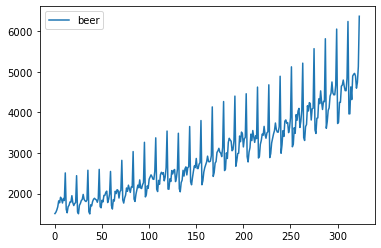

In [24]:
df.plot()

### Format the Data

In [25]:
df.columns = ['ds','y']

In [26]:
df['ds'] = pd.to_datetime(df['ds'])

In [27]:
df

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130


## Create and Fit Model

In [28]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
m

## Pronósticos del futuro

### Paso 1: Crear el dataframe donde colocaremos los resultados



In [30]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [31]:
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [32]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [33]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [34]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01



### Paso 2: Calcular los pronósticos y guardarlos en forecast

In [35]:
forecast = m.predict(future)

In [36]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1775.057120,1147.890384,1470.087090,1775.057120,1775.057120,-461.942020,-461.942020,-461.942020,-461.942020,-461.942020,-461.942020,0.0,0.0,0.0,1313.115100
1,1992-02-01,1777.777820,1182.449750,1504.884313,1777.777820,1777.777820,-427.917548,-427.917548,-427.917548,-427.917548,-427.917548,-427.917548,0.0,0.0,0.0,1349.860272
2,1992-03-01,1780.322991,1435.461773,1767.057568,1780.322991,1780.322991,-179.332380,-179.332380,-179.332380,-179.332380,-179.332380,-179.332380,0.0,0.0,0.0,1600.990611
3,1992-04-01,1783.043691,1421.194901,1741.499348,1783.043691,1783.043691,-196.385214,-196.385214,-196.385214,-196.385214,-196.385214,-196.385214,0.0,0.0,0.0,1586.658476
4,1992-05-01,1785.676626,1661.021605,1995.291846,1785.676626,1785.676626,45.045239,45.045239,45.045239,45.045239,45.045239,45.045239,0.0,0.0,0.0,1830.721866


In [37]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5200.917989,5090.306286,5421.592749,5188.919035,5213.767954,40.447867,40.447867,40.447867,40.447867,40.447867,40.447867,0.0,0.0,0.0,5241.365856
344,2020-09-01,5216.997369,4923.059502,5239.304448,5203.640572,5230.518269,-132.599775,-132.599775,-132.599775,-132.599775,-132.599775,-132.599775,0.0,0.0,0.0,5084.397594
345,2020-10-01,5232.558060,5021.687844,5349.495624,5218.315992,5246.945619,-43.161173,-43.161173,-43.161173,-43.161173,-43.161173,-43.161173,0.0,0.0,0.0,5189.396886
346,2020-11-01,5248.637440,5164.545609,5504.293373,5233.538421,5264.688885,86.244196,86.244196,86.244196,86.244196,86.244196,86.244196,0.0,0.0,0.0,5334.881636
347,2020-12-01,5264.198131,6180.937430,6505.887163,5248.287233,5281.525460,1071.893842,1071.893842,1071.893842,1071.893842,1071.893842,1071.893842,0.0,0.0,0.0,6336.091973


In [38]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [39]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4628.495065,4461.437816,4788.159577
337,2020-02-01,4678.598917,4520.597530,4835.611154
338,2020-03-01,4942.226086,4793.306159,5101.391907
339,2020-04-01,4941.252632,4776.569312,5102.761439
340,2020-05-01,5198.243777,5042.480265,5361.855021
341,2020-06-01,5179.564229,5021.442064,5364.671501
342,2020-07-01,5312.269322,5152.267819,5476.998438
343,2020-08-01,5241.365856,5090.306286,5421.592749
344,2020-09-01,5084.397594,4923.059502,5239.304448
345,2020-10-01,5189.396886,5021.687844,5349.495624


### Graficando los pronósticos


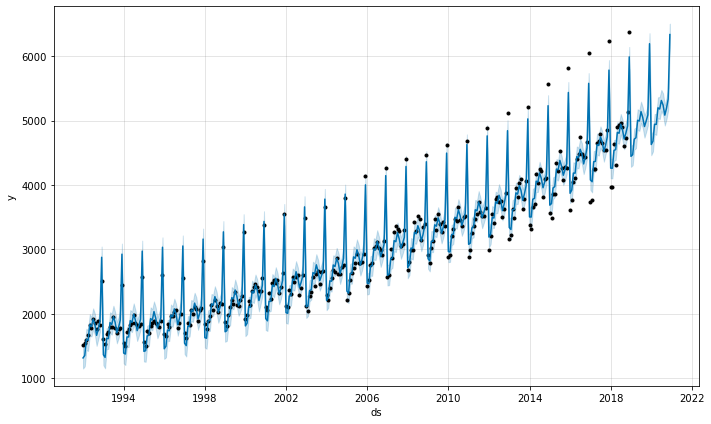

In [40]:
m.plot(forecast);

In [41]:
pd.plotting.register_matplotlib_converters()

(16071.0, 18993.0)

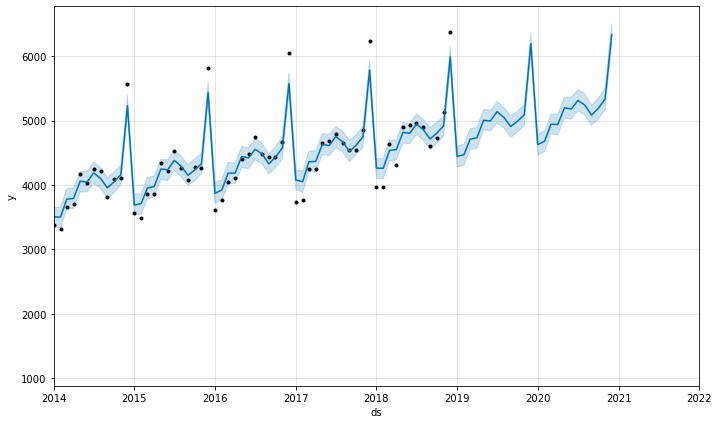

In [42]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

<AxesSubplot:xlabel='ds'>

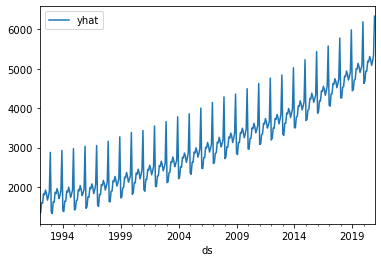

In [43]:
forecast.plot(x='ds',y='yhat')

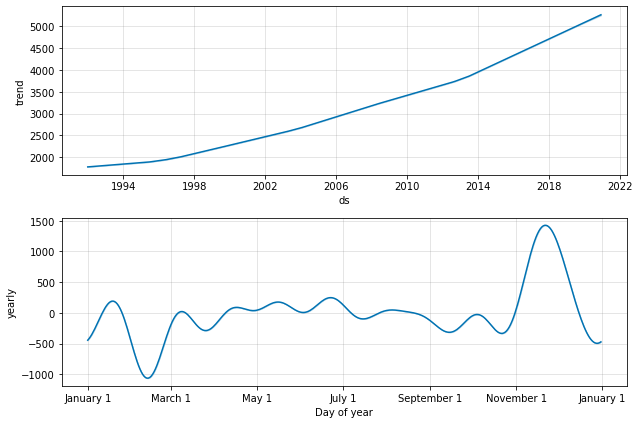

In [44]:
m.plot_components(forecast);


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


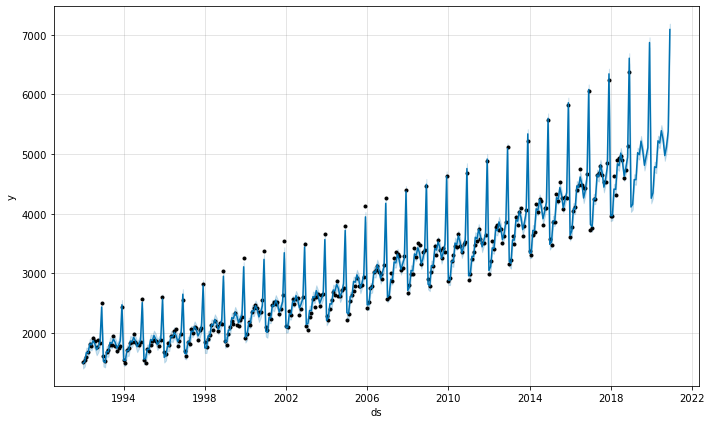

In [45]:
# Prophet tiene muchos parametros - es clave ajustarlos bien y conocerlos para no acabar con los valores por defecto

m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

In [46]:
forecast[['ds', 'yhat']].tail(24)

,ds,yhat
324,2019-01-01,4113.045324
325,2019-02-01,4158.539337
326,2019-03-01,4573.031142
327,2019-04-01,4570.679029
328,2019-05-01,5023.164816
329,2019-06-01,4990.566055
330,2019-07-01,5217.334598
331,2019-08-01,5062.539917
332,2019-09-01,4812.157297
333,2019-10-01,4957.096867
